In [75]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split


from gluonts.torch import DeepAREstimator

In [76]:
file_path_weather = 'C:\Theo\School\ESIEE\Annee\E5\TimeSeries\Projet DeepAR\Dataset\weather\weather.csv'

df_weather = pd.read_csv(file_path_weather)

In [77]:
# Remove duplicates, keeping the first occurrence
df_weather = df_weather[~df_weather.index.duplicated(keep='first')]

In [78]:
display(df_weather)

,date,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52691,2020-12-31 23:20:00,978.32,2.28,277.16,-0.80,80.0,7.20,5.76,1.44,3.67,...,0.73,1.40,180.6,0.0,0.0,0.0,0.0,0.0,13.40,433.0
52692,2020-12-31 23:30:00,978.30,2.13,277.01,-0.43,83.1,7.12,5.92,1.20,3.77,...,0.43,0.82,174.0,0.0,0.0,0.0,0.0,0.0,13.42,439.6
52693,2020-12-31 23:40:00,978.26,1.99,276.88,-0.71,82.2,7.05,5.80,1.26,3.69,...,0.38,0.76,248.9,0.0,0.0,0.0,0.0,0.0,13.45,435.2
52694,2020-12-31 23:50:00,978.26,2.07,276.95,-0.77,81.4,7.09,5.77,1.32,3.68,...,0.57,1.07,196.6,0.0,0.0,0.0,0.0,0.0,13.47,433.9


In [79]:

# Ensure your 'date' column is in datetime format and set as index
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_weather.set_index('date', inplace=True)

# Step 1: Remove exact duplicates
df_weather = df_weather[~df_weather.index.duplicated(keep='first')]

# Step 2: Select numeric columns for aggregation
numeric_cols = df_weather.select_dtypes(include='number').columns
df_weather_numeric = df_weather[numeric_cols]

# Aggregate using mean for numeric columns
df_weather_aggregated = df_weather_numeric.groupby(df_weather.index).mean()

# Step 3: Create a complete datetime index with 10-minute intervals
full_index = pd.date_range(start=df_weather.index.min(), end=df_weather.index.max(), freq='10T')

# Step 4: Reindex the DataFrame with the full datetime index
df_weather_reindexed = df_weather_aggregated.reindex(full_index)

# Step 5: Interpolate the missing values
df_weather_interpolated = df_weather_reindexed.interpolate(method='linear')

# Optional: Fill NaN values at the beginning or end with forward/backward fill
df_weather_interpolated.fillna(method='ffill', inplace=True)  # Forward fill if needed
# Or df_weather_interpolated.fillna(method='bfill', inplace=True)  # Backward fill if needed

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2444\2763147151.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_weather_interpolated.fillna(method='ffill', inplace=True)  # Forward fill if needed


In [80]:
# Add item_id column if you have multiple series, otherwise set a constant
df_weather_interpolated['item_id'] = 'weather_data'  # Change this if you have multiple series

In [81]:
display(df_weather_interpolated)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT,item_id
2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,5.49,...,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1,weather_data
2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,5.45,...,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0,weather_data
2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,5.43,...,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6,weather_data
2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,5.37,...,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0,weather_data
2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,5.42,...,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2,weather_data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:20:00,978.32,2.28,277.16,-0.80,80.0,7.20,5.76,1.44,3.67,5.89,...,1.40,180.6,0.0,0.0,0.0,0.0,0.0,13.40,433.0,weather_data
2020-12-31 23:30:00,978.30,2.13,277.01,-0.43,83.1,7.12,5.92,1.20,3.77,6.05,...,0.82,174.0,0.0,0.0,0.0,0.0,0.0,13.42,439.6,weather_data
2020-12-31 23:40:00,978.26,1.99,276.88,-0.71,82.2,7.05,5.80,1.26,3.69,5.93,...,0.76,248.9,0.0,0.0,0.0,0.0,0.0,13.45,435.2,weather_data
2020-12-31 23:50:00,978.26,2.07,276.95,-0.77,81.4,7.09,5.77,1.32,3.68,5.90,...,1.07,196.6,0.0,0.0,0.0,0.0,0.0,13.47,433.9,weather_data


In [83]:
dataset = PandasDataset(df_weather_interpolated, target="T (degC)")

In [84]:
# Split data for training and testing
training_data, test_gen = split(dataset, offset=-36)
test_data = test_gen.generate_instances(prediction_length=12, windows=3)

In [85]:
# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=12, freq="M", trainer_kwargs={"max_epochs": 5}
).train(training_data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params | In sizes                                                   | Out sizes   
------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 23.3 K | [[1, 1], [1, 1], [1, 48, 2], [1, 48], [1, 48], [1, 12, 2]] | [1, 100, 12]
------------------------------------------------------------------------------------------------------------------
23.3 K    Trainable params
0         Non-trainable params
23.3 K    Total params
0.093     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 50: 'train_loss' reached 2.75454 (best 2.75454), saving model to 'c:\\Theo\\School\\ESIEE\\Annee\\E5\\TimeSeries\\Projet DeepAR\\lightning_logs\\version_2\\checkpoints\\epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached 1.78308 (best 1.78308), saving model to 'c:\\Theo\\School\\ESIEE\\Annee\\E5\\TimeSeries\\Projet DeepAR\\lightning_logs\\version_2\\checkpoints\\epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' reached 1.56003 (best 1.56003), saving model to 'c:\\Theo\\School\\ESIEE\\Annee\\E5\\TimeSeries\\Projet DeepAR\\lightning_logs\\version_2\\checkpoints\\epoch=2-step=150.ckpt' as top 1
Epoch 3, global step 200: 'train_loss' reached 1.38410 (best 1.38410), saving model to 'c:\\Theo\\School\\ESIEE\\Annee\\E5\\TimeSeries\\Projet DeepAR\\lightning_logs\\version_2\\checkpoints\\epoch=3-step=200.ckpt' as top 1
Epoch 4, global step 250: 'train_loss' reached 1.20814 (best 1.20814), saving model to 'c:\\Theo\\School\\ESIE

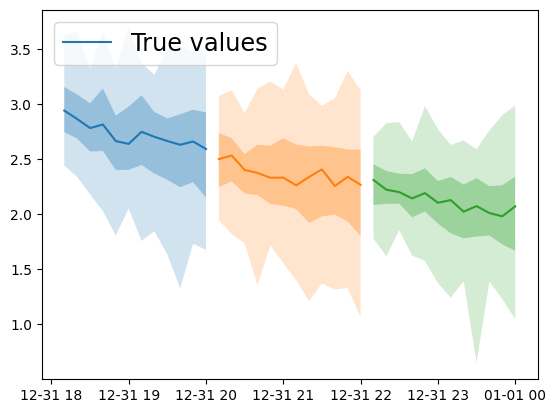

In [100]:
forecasts = list(model.predict(test_data.input))

# # Plot predictions
# plt.plot(df_weather_interpolated["T (degC)"], color="black")
for forecast in forecasts:
  forecast.plot()
plt.legend(["True values"], loc="upper left", fontsize="xx-large")
plt.show()


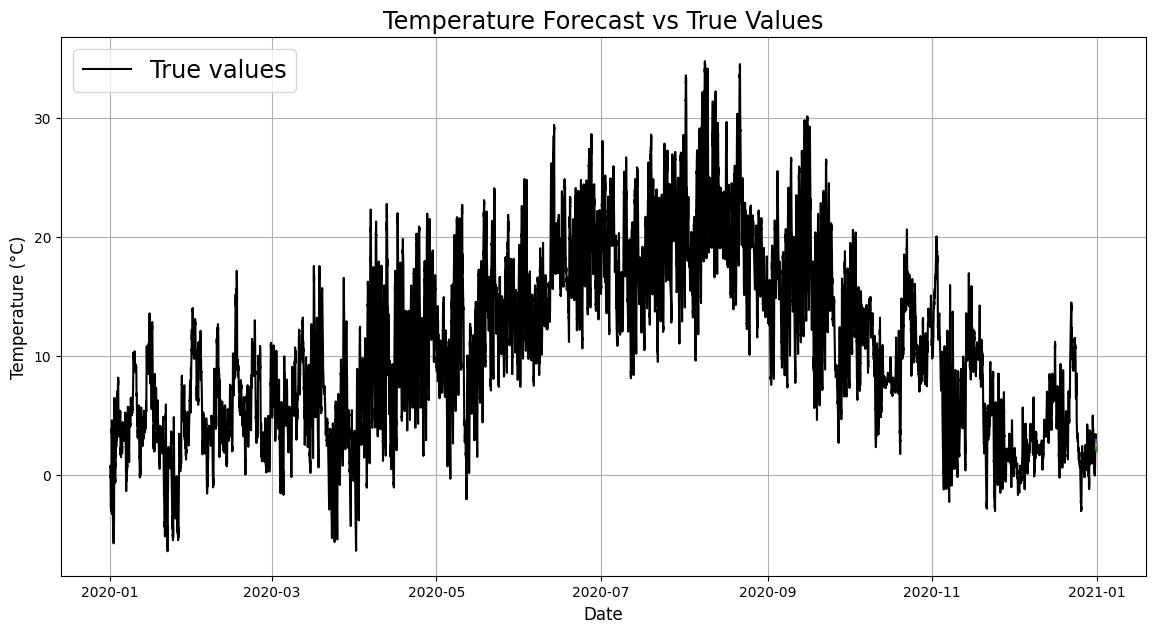

In [99]:
# Assuming the true values and forecasts are both indexed by date
plt.figure(figsize=(14, 7))

# Plot true values
plt.plot(df_weather_interpolated.index, df_weather_interpolated["T (degC)"], color="black", label="True values")

# Plot each forecast
for forecast in forecasts:
  forecast.plot()

# Add legend and labels
plt.legend(loc="upper left", fontsize="xx-large")
plt.xlabel("Date", fontsize="large")
plt.ylabel("Temperature (°C)", fontsize="large")
plt.title("Temperature Forecast vs True Values", fontsize="xx-large")
plt.grid()
plt.show()